In [19]:
!pip3 install tensorflow

In [20]:
from keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

In [21]:
len(train_images), len(test_images)

(60000, 10000)

In [22]:
import matplotlib.pyplot as plt

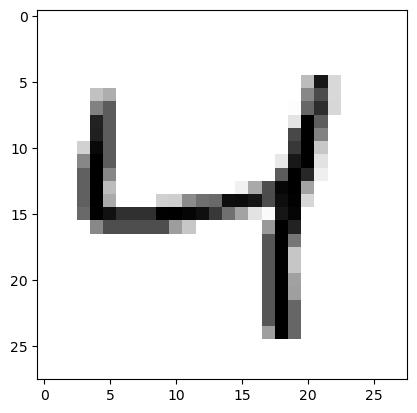

In [23]:
plt.imshow(train_images[2],cmap=plt.cm.binary)

In [24]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [25]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [26]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

/Users/umair/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
network.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
network.get_weights()

[array([[-0.02467227, -0.02259707, -0.00838437, ...,  0.05221804,
         -0.03873294, -0.02585163],
        [ 0.01509752,  0.03867842,  0.06033847, ..., -0.02953919,
         -0.03380597,  0.00888553],
        [ 0.02676456, -0.05839145,  0.02820489, ...,  0.06377982,
         -0.06725109, -0.04552974],
        ...,
        [-0.02925141, -0.01249131,  0.0284794 , ...,  0.06382824,
          0.06452851,  0.01707668],
        [ 0.00784995,  0.04027077,  0.05403108, ...,  0.00222202,
          0.01442137, -0.06021927],
        [ 0.04126146,  0.00871209, -0.06442627, ..., -0.06592786,
          0.05107585, -0.03676942]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [41]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

In [48]:
train_images[14]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [45]:
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

In [46]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [49]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [50]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [51]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1100 - loss: 2.3018
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1125 - loss: 2.3013
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1137 - loss: 2.3010
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1109 - loss: 2.3013
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1120 - loss: 2.3012


In [52]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("Test Accuracy: ", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0952 - loss: 2.4271
Test Accuracy:  0.0877000018954277
